In [2]:
# Step 1: Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/hp/Downloads/1705482784_insurance/insurance.csv")

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
#Step 2: Check the shape and data types
# Shape and datatypes
print("Shape of dataset:", df.shape)
print("\nData types of columns:")
print(df.dtypes)

Shape of dataset: (1338, 7)

Data types of columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Observation: This shows how many rows & columns exist, and whether each column is numerical or categorical.

In [10]:
#Step 3: Check for missing values
# Missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())
#If missing values exist, we can fill them appropriately (mean/median for numerical, mode for categorical).
# Fill missing values if any
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


Missing values in dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Observation: Typically, the insurance.csv dataset has no missing values.

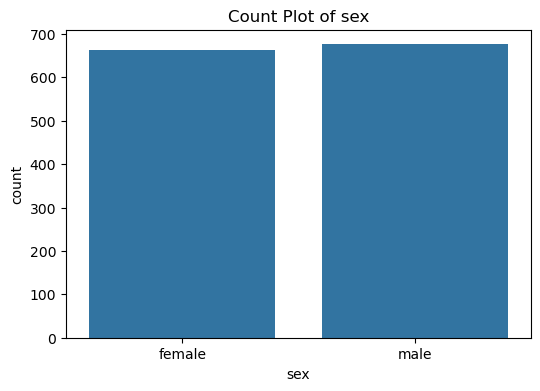

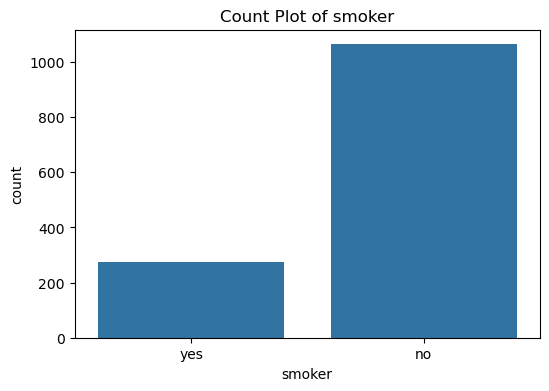

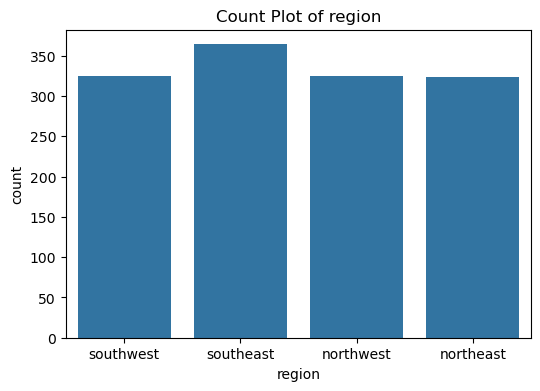

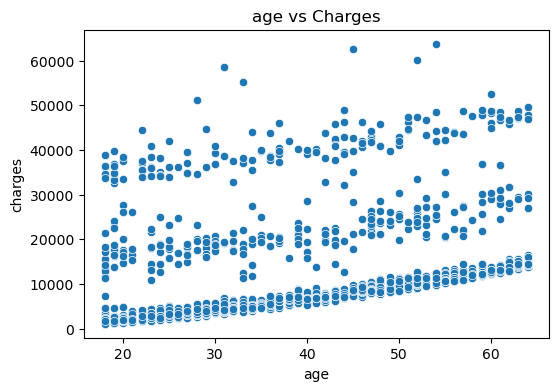

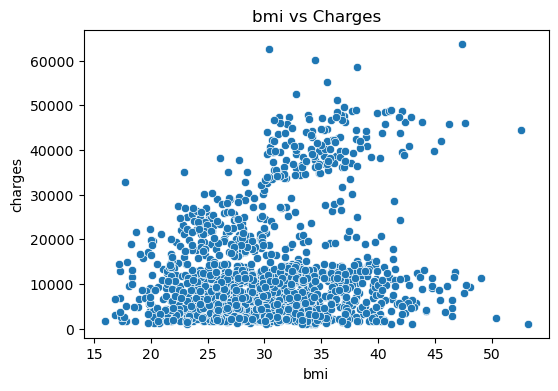

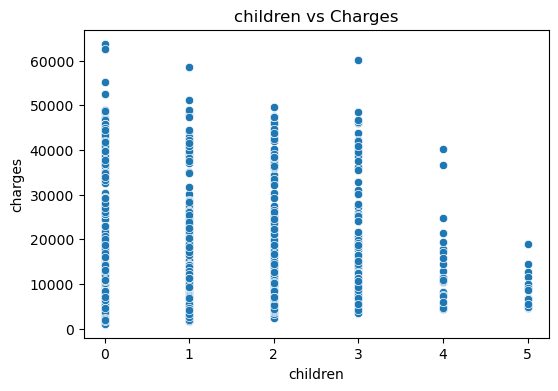

In [16]:
#Step 4: Explore relationship between features and target (charges)
#Count plots for categorical columns:
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.show()
#Scatter plots for numerical columns:
numerical_cols = ['age', 'bmi', 'children']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='charges', data=df)
    plt.title(f"{col} vs Charges")
    plt.show()

## Observation: Charges tend to be higher for smokers. Age and BMI show a positive correlation with charges.

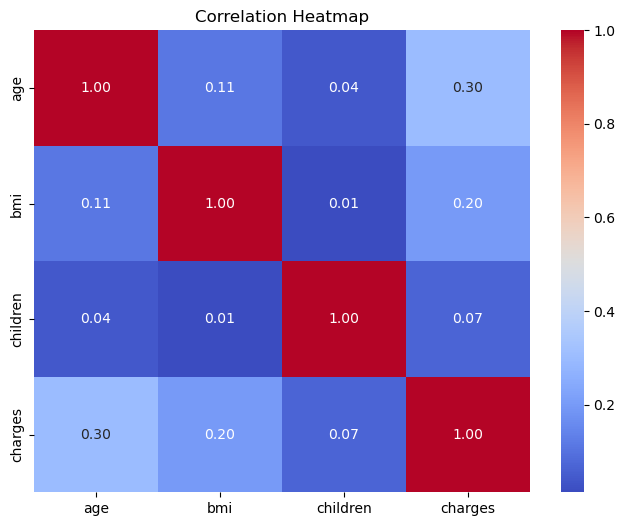

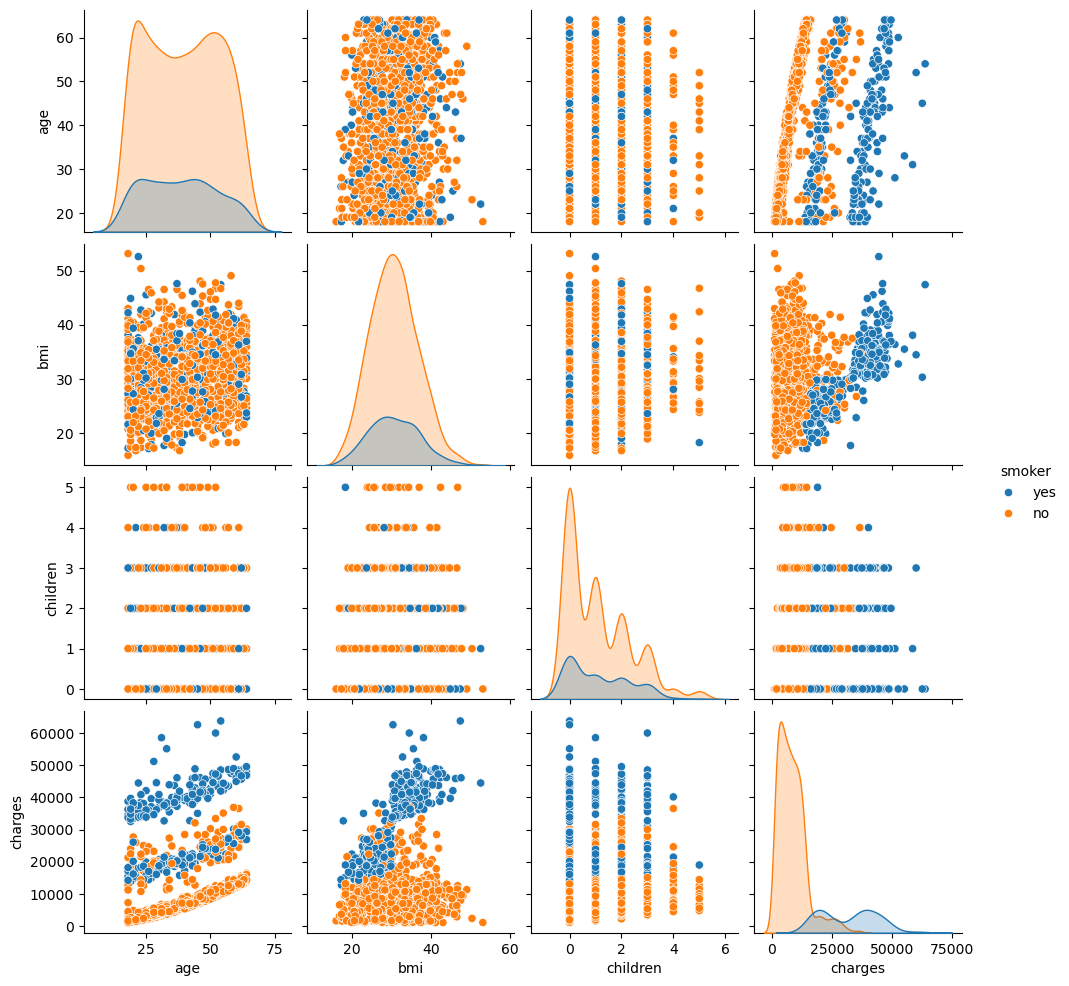

In [23]:
#Step 5: Feature vs Feature visualization
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df, hue="smoker")
plt.show()

## Observation: Strong correlation between smoker and charges.Age and BMI moderately impact charges.

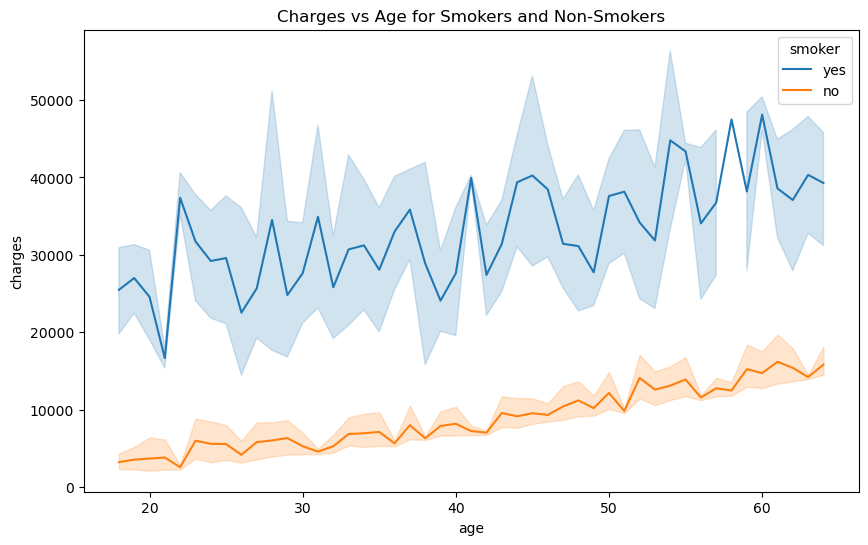

In [27]:
#Step 6: Check if premium charges for smokers vs non-smokers increase with age
plt.figure(figsize=(10,6))
sns.lineplot(x="age", y="charges", hue="smoker", data=df, estimator="mean")
plt.title("Charges vs Age for Smokers and Non-Smokers")
plt.show()

## Observation: Charges increase with age for both groups. Smokers consistently have much higher charges compared to non-smokers at all ages.